Topic:        Challenge Set 1
Subject:      Explore MTA turnstile data
Date:         01/23/2013
Name:         Emy Parparita
Worked with:  Diane Quillao, Davis Vance, Ed Leardi

In [1]:
import sys
import os
import glob

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

**Challenge 1:** Load turnstile data.

In [3]:
url_fmt = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
cache_file_fmt = "01-mta-data/turnstile_{}.txt"
week_list = ["171230", "180106", "180113"]

# Build the list of files to load: from the cache dir or straight from the URL:
file_list = []
for week in week_list:
    fname = cache_file_fmt.format(week)
    file_list.append(fname if os.path.isfile(fname) else
                     url_fmt.format(week))
# Load the files:
turnstile_df = pd.concat([pd.read_csv(fname, header=0) for fname in file_list])

In [4]:
# Remove prefix/trailing spaces from col names:
turnstile_df.rename(columns=str.strip, inplace=True)

In [5]:
turnstile_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/23/2017,03:00:00,REGULAR,6455840,2184987
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/23/2017,07:00:00,REGULAR,6455856,2184995
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/23/2017,11:00:00,REGULAR,6455899,2185082
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/23/2017,15:00:00,REGULAR,6456038,2185156
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/23/2017,19:00:00,REGULAR,6456327,2185197
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/23/2017,23:00:00,REGULAR,6456484,2185222
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/24/2017,03:00:00,REGULAR,6456525,2185229
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/24/2017,07:00:00,REGULAR,6456535,2185245
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/24/2017,11:00:00,REGULAR,6456582,2185295
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/24/2017,15:00:00,REGULAR,6456748,2185348


**Challenge 2:** Create DATETIME col.

In [8]:
turnstile_df['DATE_TIME'] = pd.to_datetime(
    turnstile_df['DATE'] + ' ' + turnstile_df['TIME'],
    infer_datetime_format=True)

In [9]:
turnstile_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/23/2017,03:00:00,REGULAR,6455840,2184987,2017-12-23 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/23/2017,07:00:00,REGULAR,6455856,2184995,2017-12-23 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/23/2017,11:00:00,REGULAR,6455899,2185082,2017-12-23 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/23/2017,15:00:00,REGULAR,6456038,2185156,2017-12-23 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/23/2017,19:00:00,REGULAR,6456327,2185197,2017-12-23 19:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/23/2017,23:00:00,REGULAR,6456484,2185222,2017-12-23 23:00:00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/24/2017,03:00:00,REGULAR,6456525,2185229,2017-12-24 03:00:00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/24/2017,07:00:00,REGULAR,6456535,2185245,2017-12-24 07:00:00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/24/2017,11:00:00,REGULAR,6456582,2185295,2017-12-24 11:00:00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/24/2017,15:00:00,REGULAR,6456748,2185348,2017-12-24 15:00:00


**Challenge 3:** Daily entries per turnstile.  
** Note ** Using lecture notes.

In [10]:
# Sez Davis:  "... when observing 14 St-Union Sq. with 2 lines: 456LNQRW, LNQR456W, which are anagrammatical."
# Normalize the LINENAME order and content, no dups, sorted lexicographically.

def normalize_line(line):
    """Normalize line list (a line is a single char)
    LNQR456W -> 456LNQRW
    """
    return ''.join(sorted(set(line)))

turnstile_df['LINENAME'] = turnstile_df['LINENAME'].apply(normalize_line)

In [11]:
# Remove duplicate entries for the same turnstile and datetime:
turnstile_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True)
turnstile_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], keep="last", inplace=True)

In [12]:
# Convert DATE from string to datetime to be able to sort on it in chronological order:
turnstile_df["DATE"] = pd.to_datetime(turnstile_df["DATE"], infer_datetime_format=True)

In [75]:
# Group to daily data for each turnstile; keep the last entry in each group since the rows are sorted
# in chronological order (for duplicate removal) so the last entry has the count for the day.
# Keep only the counter columns:
turnstile_daily = turnstile_df.groupby(
    ["C/A", "UNIT", "SCP", "STATION", "LINENAME", "DATE"], as_index=False,
)["ENTRIES", "EXITS"].last()

In [76]:
turnstile_daily.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,456NQRW,2017-12-23,6456484,2185222
1,A002,R051,02-00-00,59 ST,456NQRW,2017-12-24,6457068,2185408
2,A002,R051,02-00-00,59 ST,456NQRW,2017-12-25,6457304,2185517
3,A002,R051,02-00-00,59 ST,456NQRW,2017-12-26,6458617,2185926
4,A002,R051,02-00-00,59 ST,456NQRW,2017-12-27,6460108,2186486
5,A002,R051,02-00-00,59 ST,456NQRW,2017-12-28,6461523,2187010
6,A002,R051,02-00-00,59 ST,456NQRW,2017-12-29,6463058,2187547
7,A002,R051,02-00-00,59 ST,456NQRW,2017-12-30,6463887,2187833
8,A002,R051,02-00-00,59 ST,456NQRW,2017-12-31,6464443,2188049
9,A002,R051,02-00-00,59 ST,456NQRW,2018-01-01,6464907,2188209


In [77]:
turnstile_daily.tail(10)

,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,EXITS
98650,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,2018-01-03,2447711,27440
98651,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,2018-01-04,2448051,27538
98652,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,2018-01-05,2448770,27578
98653,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,2018-01-06,2449637,27587
98654,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,2018-01-07,2450303,27594
98655,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,2018-01-08,2451237,27599
98656,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,2018-01-09,2452191,27606
98657,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,2018-01-10,2453135,27610
98658,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,2018-01-11,2454127,27617
98659,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,2018-01-12,2455035,27632


In [78]:
# The counters are cumulative since an arbitrary point in time, when they were
# either reset or they rolled over. What is needed are deltas from the previous
# day; build PREV_... cols:
turnstile_daily[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (
    turnstile_daily
    .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES", "EXITS"]
    .transform(lambda grp: grp.shift(1)))

In [79]:
# Drop the rows for which there is no previous day (the 1st day for each
# turnstile, that is):
turnstile_daily.dropna(subset=["PREV_DATE"], inplace=True)

In [80]:
# The daily counts would be the deltas between COL and PREV_COL; however as
# the lecture notes point out this may lead to unrealistic results like
# negative or unresonably large values for certain cases.
# Therefore a smart function is needed to compute the values.
def get_daily_counts(row, col_name, max_counter):
    prev_col_name = "PREV_" + col_name
    counter = row[col_name] - row[prev_col_name]
    if counter < 0:
        # Special case 1: 2 rows had the agg counters swapped in the original file, e.g.
        #  date1, count2
        #  date2, count1
        counter = -counter
    if counter > max_counter:
        # Special case 2: the negative value corrected above is not due to a swap
        # but rather due to agg counter reset between date1, date2. Pick the current
        # value for the delta by making the assumption that the reset occurred close
        # to the begining of the day
        counter = row[col_name]
    if counter > max_counter:
        # Last sanity check; unrealistic values will be replaced with
        # NaN's to ensure that they are not part of the analysis.
        counter = np.nan
    return counter

max_counter = 1000000
turnstile_daily["DAILY_ENTRIES"] = turnstile_daily.apply(get_daily_counts, 
                                                         axis=1, col_name="ENTRIES", max_counter=max_counter)
turnstile_daily["DAILY_EXITS"] = turnstile_daily.apply(get_daily_counts, 
                                                       axis=1, col_name="EXITS", max_counter=max_counter)

In [81]:
# Spot check unresonable values:
turnstile_daily[turnstile_daily.isnull().any(axis=1)]

,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS
4409,A050,R088,00-02-00,CORTLANDT ST,NRW,2017-12-29,3391347,1725814,2017-12-28,0.0,0.0,NaN,NaN
13583,E014,R374,00-00-01,BAY PKWY,D,2018-01-09,13506009,10812127,2018-01-08,2002932.0,2135069.0,NaN,NaN
13584,E014,R374,00-00-01,BAY PKWY,D,2018-01-10,2006045,2137973,2018-01-09,13506009.0,10812127.0,NaN,NaN
24576,N062A,R010,00-05-00,42 ST-PORT AUTH,1237ACENQRSW,2018-01-05,68255371,18339609,2018-01-04,19470151.0,3129055.0,NaN,NaN
24597,N062A,R010,00-05-01,42 ST-PORT AUTH,1237ACENQRSW,2018-01-05,19471967,3130843,2018-01-04,68253734.0,18338043.0,NaN,NaN
62160,R103,R304,00-06-00,RECTOR ST,1,2018-01-08,67168490,33847769,2018-01-07,117556813.0,2210621.0,NaN,NaN
98625,TRAM2,R469,00-03-00,RIT-ROOSEVELT,R,2017-12-30,3929944,56739,2017-12-29,491926.0,18684.0,NaN,38055.0


In [82]:
# Not too many, discard them:
turnstile_daily.dropna(inplace=True)

In [83]:
# Finally convert the DAILY_... cols to int; they might be float because the values included NaN's:
turnstile_daily[["DAILY_ENTRIES", "DAILY_EXITS"]] = (
    turnstile_daily[["DAILY_ENTRIES", "DAILY_EXITS"]].astype(np.int32))

In [84]:
turnstile_daily.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS
1,A002,R051,02-00-00,59 ST,456NQRW,2017-12-24,6457068,2185408,2017-12-23,6456484.0,2185222.0,584,186
2,A002,R051,02-00-00,59 ST,456NQRW,2017-12-25,6457304,2185517,2017-12-24,6457068.0,2185408.0,236,109
3,A002,R051,02-00-00,59 ST,456NQRW,2017-12-26,6458617,2185926,2017-12-25,6457304.0,2185517.0,1313,409
4,A002,R051,02-00-00,59 ST,456NQRW,2017-12-27,6460108,2186486,2017-12-26,6458617.0,2185926.0,1491,560
5,A002,R051,02-00-00,59 ST,456NQRW,2017-12-28,6461523,2187010,2017-12-27,6460108.0,2186486.0,1415,524
6,A002,R051,02-00-00,59 ST,456NQRW,2017-12-29,6463058,2187547,2017-12-28,6461523.0,2187010.0,1535,537
7,A002,R051,02-00-00,59 ST,456NQRW,2017-12-30,6463887,2187833,2017-12-29,6463058.0,2187547.0,829,286
8,A002,R051,02-00-00,59 ST,456NQRW,2017-12-31,6464443,2188049,2017-12-30,6463887.0,2187833.0,556,216
9,A002,R051,02-00-00,59 ST,456NQRW,2018-01-01,6464907,2188209,2017-12-31,6464443.0,2188049.0,464,160
10,A002,R051,02-00-00,59 ST,456NQRW,2018-01-02,6466375,2188704,2018-01-01,6464907.0,2188209.0,1468,495


** Challenge 4:** Plot daily counts for a turnstile

In [85]:
# Pick the turnstile with max daily entries:
turnstile_daily.loc[turnstile_daily.DAILY_ENTRIES.idxmax()]

C/A                             R183
UNIT                            R260
SCP                         00-00-02
STATION                       181 ST
LINENAME                           1
DATE             2017-12-29 00:00:00
ENTRIES                          320
EXITS                            777
PREV_DATE        2017-12-28 00:00:00
PREV_ENTRIES                  759876
PREV_EXITS                1.3746e+06
DAILY_ENTRIES                 759556
DAILY_EXITS                      777
Name: 70422, dtype: object

In [86]:
ca, unit, scp, station = "R183", "R260", "00-00-02", "181 ST"
mask = (
    (turnstile_daily["C/A"] == ca) &
    (turnstile_daily["UNIT"] == unit) &
    (turnstile_daily["SCP"] == scp) &
    (turnstile_daily["STATION"] == station)
)
dates = turnstile_daily[mask]["DATE"]
entry_counts = turnstile_daily[mask]["DAILY_ENTRIES"]
exit_counts = turnstile_daily[mask]["DAILY_EXITS"]

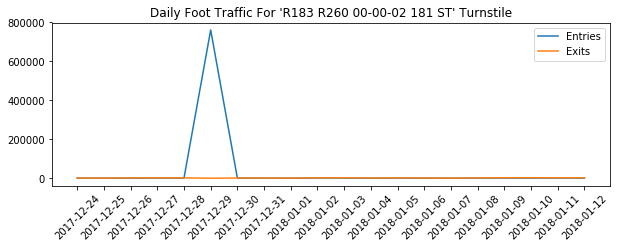

In [87]:
title = "Daily Foot Traffic For '{} {} {} {}' Turnstile".format(ca, unit, scp, station)
locator = mdates.DayLocator()

plt.figure(figsize=(10,3))
plt.plot(dates, entry_counts, label='Entries')
plt.plot(dates, exit_counts, label='Exits')
plt.legend()
plt.title(title)
plt.xticks(rotation=45)
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
plt.show()

**TODO** Should learn how to remove all outliers for all turnstiles.

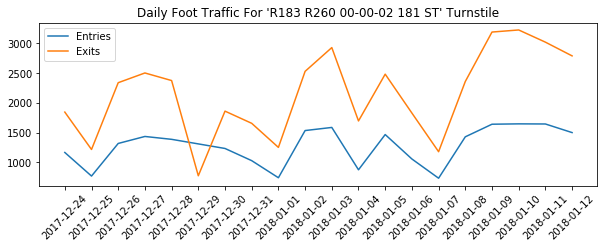

In [88]:
# The Entries max is clearly an outlier, remove it from the data set:
idx = entry_counts.idxmax()
clean_entry_counts = entry_counts.drop(idx)
clean_entry_dates = dates.drop(idx)

plt.figure(figsize=(10,3))
plt.plot(clean_entry_dates, clean_entry_counts, label='Entries')
plt.plot(dates, exit_counts, label='Exits')
plt.legend()
plt.title(title)
plt.xticks(rotation=45)
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
plt.show()

**Challenge 5:** Combine daily counts for C/A,UNIT,STATION tuple

In [89]:
ca_unit_station_daily = turnstile_daily.groupby(
    ["C/A", "UNIT", "STATION", "DATE"], as_index=False
)["DAILY_ENTRIES", "DAILY_EXITS"].sum()


In [90]:
ca_unit_station_daily.head(10)

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS
0,A002,R051,59 ST,2017-12-24,5369,2983
1,A002,R051,59 ST,2017-12-25,3128,1796
2,A002,R051,59 ST,2017-12-26,11262,6904
3,A002,R051,59 ST,2017-12-27,13904,8226
4,A002,R051,59 ST,2017-12-28,13617,7954
5,A002,R051,59 ST,2017-12-29,13386,7766
6,A002,R051,59 ST,2017-12-30,7944,4336
7,A002,R051,59 ST,2017-12-31,5939,3299
8,A002,R051,59 ST,2018-01-01,4961,2755
9,A002,R051,59 ST,2018-01-02,12592,7775


** Challenge 6:** Combine daily counts for STATION

In [111]:
### Won't do this for now, maybe later
## The same station name may appear for multiple lines; use the STATION, LINENAME as the unique code
## for a station:
#station_daily = turnstile_daily.groupby(
#    ["STATION", "LINENAME", "DATE"], as_index=False
#)["DAILY_ENTRIES", "DAILY_EXITS"].sum()
#station_daily["STATION"] = station_daily["STATION"] + "/" + station_daily["LINENAME"]
#station_daily.drop(labels=["LINENAME"], axis=1, inplace=True, errors='ignore')

station_daily = turnstile_daily.groupby(
    ["STATION", "DATE"], as_index=False
)["DAILY_ENTRIES", "DAILY_EXITS"].sum()

In [123]:
# Build per station time series:

# Use a dict for now until I figure out how to use a Panda object
station_daily_ts = {} 
for station, station_group_df in station_daily.groupby("STATION"):
    station_ts = (
        station_group_df
        .drop(labels="STATION", axis=1, errors='ignore')
        .set_index("DATE")
    )
    station_daily_ts[station] = station_ts

** Challenge 7:** Plot the time series for a station

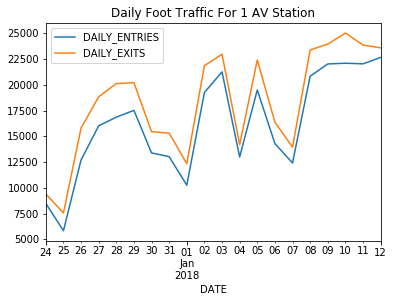

In [129]:
station = '1 AV'
station_daily_ts[station].plot(title='Daily Foot Traffic For {} Station'.format(station));